# GDP analysis for Indonesia

## Imports 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
os.chdir('..')
from src.regressions import *
from src.helpers import *
from src.statistical_analysis import *
from src.evaluation_metrics import *
from src.feature_engineering import *
os.chdir('notebooks')

## Loading and visualizing the dataset 

Load the dataset in a pandas dataframe.

In [3]:
PATH = os.path.join("..", "data", "indonesia.csv")

dataset = pd.read_csv(PATH)

Visualize the dataset.

In [4]:
dataset

,YEAR,CGPD RELATIVE TO THE UNITED STATES (unit US=100),CONSUMPTION SHARE OF CGPD (unit %),CONSUMPTION SHARE OF RGDPL (unit %),CURRENT SAVINGS (unit %),EXCHANGE RATE (unit US=1),GOVERNMENT SHARE OF CGDP (unit %),GOVERNMENT SHARE OF RGDPL (unit %),INVESTMENT SHARE OF CGDP (unit %),INVESTMENT SHARE OF RGDPL (unit %),OPENNESS IN CONSTANT PRICES (unit %),OPENNESS IN CURRENT PRICES (unit %),POPULATION (unit 000S),PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE),PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE),PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100),PRICE LEVEL OF INVESTMENT (unit PPP/XRATE),RATIO OF GNP TO GDP (CURRENT PRICES) (unit %),REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot the GDP as a function of year.

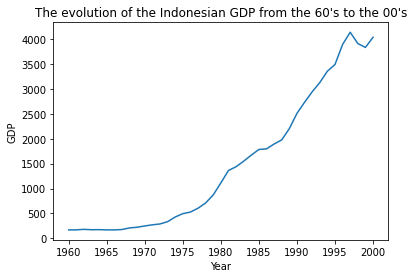

In [5]:
plt.plot(dataset["YEAR"], dataset["REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)"])
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("The evolution of the Indonesian GDP from the 60's to the 00's")
plt.show()

Split the dataset into a matrix `X` for the features and a vector `y` for the labels.

In [6]:
ds = dataset.drop(columns=["YEAR"])
X, y = X_y_from_dataset(dataset.drop(columns=["YEAR"]))
print("We have", X.shape[0], "data points and", X.shape[1], "features")

We have 41 data points and 17 features


In [7]:
ds.columns

Index(['CGPD RELATIVE TO THE UNITED STATES (unit US=100)',
       'CONSUMPTION SHARE OF CGPD (unit %)',
       'CONSUMPTION SHARE OF RGDPL (unit %)', 'CURRENT SAVINGS (unit %)',
       'EXCHANGE RATE (unit US=1)', 'GOVERNMENT SHARE OF CGDP (unit %)',
       'GOVERNMENT SHARE OF RGDPL (unit %)',
       'INVESTMENT SHARE OF CGDP (unit %)',
       'INVESTMENT SHARE OF RGDPL (unit %)',
       'OPENNESS IN CONSTANT PRICES (unit %)',
       'OPENNESS IN CURRENT PRICES (unit %)', 'POPULATION (unit 000S)',
       'PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE)',
       'PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE)',
       'PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100)',
       'PRICE LEVEL OF INVESTMENT (unit PPP/XRATE)',
       'RATIO OF GNP TO GDP (CURRENT PRICES) (unit %)',
       'REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)'],
      dtype='object')

Verify whether there are highly correlated features.

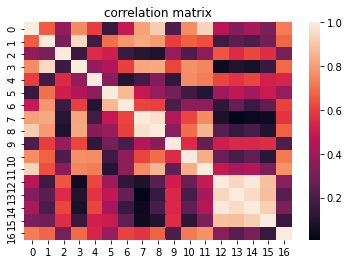

CGPD RELATIVE TO THE UNITED STATES (unit US=100) is highly correlated with:  INVESTMENT SHARE OF CGDP (unit %), INVESTMENT SHARE OF RGDPL (unit %), POPULATION (unit 000S) 

CONSUMPTION SHARE OF CGPD (unit %) is highly correlated with:  CURRENT SAVINGS (unit %), INVESTMENT SHARE OF CGDP (unit %) 

CURRENT SAVINGS (unit %) is highly correlated with:  CONSUMPTION SHARE OF CGPD (unit %), INVESTMENT SHARE OF CGDP (unit %), INVESTMENT SHARE OF RGDPL (unit %) 

GOVERNMENT SHARE OF CGDP (unit %) is highly correlated with:  GOVERNMENT SHARE OF RGDPL (unit %) 

GOVERNMENT SHARE OF RGDPL (unit %) is highly correlated with:  GOVERNMENT SHARE OF CGDP (unit %) 

INVESTMENT SHARE OF CGDP (unit %) is highly correlated with:  CGPD RELATIVE TO THE UNITED STATES (unit US=100), CONSUMPTION SHARE OF CGPD (unit %), CURRENT SAVINGS (unit %), INVESTMENT SHARE OF RGDPL (unit %) 

INVESTMENT SHARE OF RGDPL (unit %) is highly correlated with:  CGPD RELATIVE TO THE UNITED STATES (unit US=100), CURRENT SAVINGS (un

In [8]:
correlation_matrix = np.abs(np.corrcoef(X, rowvar=False))

sns.heatmap(correlation_matrix)
plt.title("correlation matrix")
plt.show()

mask = correlation_matrix > 0.8
np.fill_diagonal(mask, False)
for i, m in enumerate(mask): 
    if (sum(m) != 0):
        print(ds.columns[i], "is highly correlated with: ",
              ", ".join(ds.columns[np.append(m, [False])]), "\n")

Plot the population evolution through time. It's clear they're highly correlated features.

<AxesSubplot:xlabel='YEAR', ylabel='POPULATION (unit 000S)'>

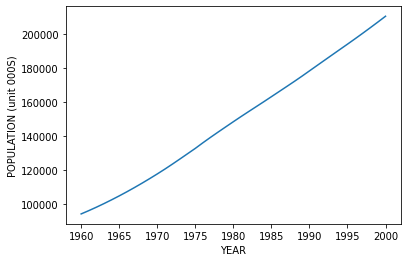

In [9]:
sns.lineplot(x="YEAR", y="POPULATION (unit 000S)", data=dataset)

In [10]:
print("The condition number is", condition_number(X))

The condition number is 1412337.5214179868


In [11]:
VIF_X = VIF(X)
print("The VIF is:", VIF_X, "\n The column with the highest VIF is", dataset.columns[np.argmax(VIF_X)])

The VIF is: [ 154.05892039  352.11852442   48.3992196   135.12507229   58.96771527
  199.00790508  187.92924288  604.41314445 1044.75789812   17.14474442
   20.74436827  226.36963116 1218.34324407   46.7707481  2107.30317543
   56.00731037   14.29586349] 
 The column with the highest VIF is PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE)


The condition number, VIF and correlation matrix all tend to indicate that our data is kind off ill conditionned. We have to perform at least either some model selection, or filter out some predictors.

Now let us verify homoskedasticity with the Breusch–Pagan test. 

In [12]:
_, p_value, s = breusch_pagan_test(X, y)
print(s, "because the p-value is: ", p_value)

No significant heteroskedasticity. because the p-value is:  0.2994293281659991


## The models

Split the data into 80% training and 20% testing sets.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
year = dataset.dropna()["YEAR"]

### Least Squares

Train with the least squares estimator.

0

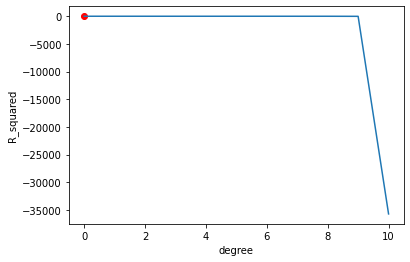

In [14]:
# Degree of zero means we leave the data set the way it is degree of 1 means we simply add a bias degree > 1
# We compute the polynomial expansion associated with that degree.
d = degree_cross_val(X_train, y_train, 10)
d

Augment the dataset.

In [15]:
# We split the dataset as instructed: the first 80% as train and the next 20% as test.
X_ls = build_poly(X, d)
X_train_ls, X_test_ls, _, _ = train_test_split(X_ls, y)

In [16]:
LS_w = least_squares(X_train_ls, y_train)

LS_prediction_data = predict(X_ls, LS_w)
LS_prediction_test = predict(X_test_ls, LS_w)

In [17]:
print("Testing R^2: ", R_squared(y_test, LS_prediction_test),
      "\nFull data R^2:", R_squared(y, LS_prediction_data))

Testing R^2:  -1.3979118946844502 
Full data R^2: 0.9535143994005001


In [18]:
print("Full data adjusted R^2:", adjusted_R_squared(y, LS_prediction_data, X.shape[1]))

Full data adjusted R^2: 0.9191554772182611


In [19]:
print("Testing RMSE: ", RMSE(y_test, LS_prediction_test),
      "\nFull data RMSE:", RMSE(y, LS_prediction_data))

tot = np.mean(y_test)

print("This implies only", RMSE(y_test, LS_prediction_test)/tot, "error rate on the test and", RMSE(y, LS_prediction_data)/tot, "on the full dataset")

Testing RMSE:  617.7400052772816 
Full data RMSE: 290.4610045376865
This implies only 0.16993818449140366 error rate on the test and 0.07990483917991949 on the full dataset


Compute the CI for the coefficients.

In [20]:
X_for_var, w_for_var = (X_ls[:, 1:], LS_w[1:]) if d > 0 else (X, LS_w)
var = variance_least_squares_weights(X_for_var, y, LS_prediction_data)
lower_CI, upper_CI = confidence_interval(X_for_var.shape[0], X_for_var.shape[1], w_for_var, var)

Plot the coefficients with their CI intervals.

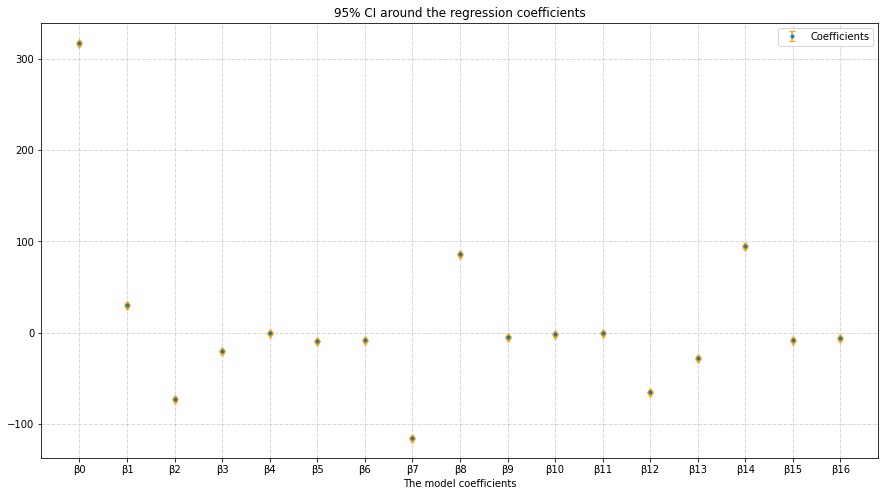

In [21]:
plt.figure(figsize=(15,8))
plt.errorbar(np.arange(X_for_var.shape[1]), w_for_var,
             yerr=np.vstack([np.squeeze(w_for_var-lower_CI), np.squeeze(upper_CI-w_for_var)]),
             fmt=".", ecolor='orange', lolims=True, uplims=True, label="Coefficients")
plt.xticks(np.arange(X.shape[1]), ["β"+str(i) for i in np.arange(X_for_var.shape[1])])
plt.title("95% CI around the regression coefficients")
plt.xlabel("The model coefficients")
plt.legend()
plt.grid(which='both', linestyle='-.', linewidth=0.5)
plt.show()

Compute the CI for the predictions.

In [22]:
var_ = variance_least_squares_line(X_for_var, y, LS_prediction_data)
lower_CI_line, upper_CI_line = confidence_interval(X_for_var.shape[0], X_for_var.shape[1], LS_prediction_data,
                                                   var_)

Plot the CI for the predictions.

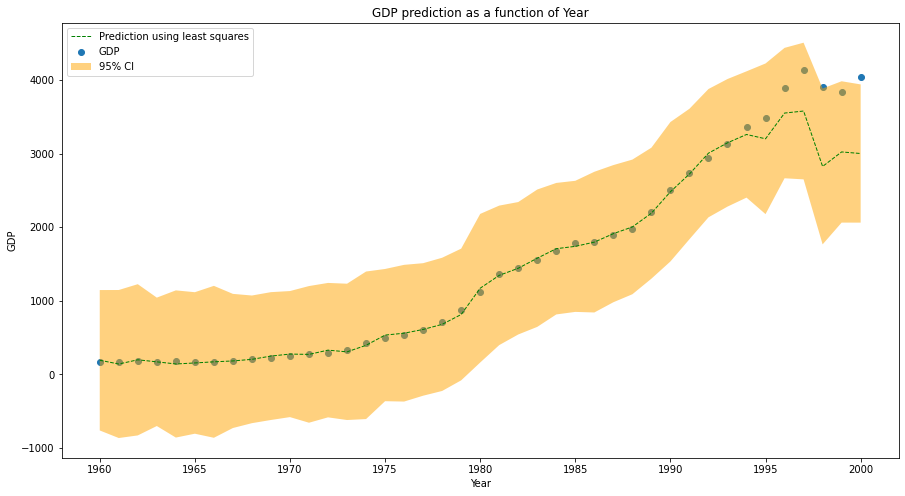

In [23]:
plt.figure(figsize=(15,8))
plt.scatter(year, y, label="GDP")
plt.plot(year, LS_prediction_data, color="g", lw=1, ls='--', label="Prediction using least squares")
plt.gca().fill_between(year, np.squeeze(lower_CI_line), np.squeeze(upper_CI_line),
                       label="95% CI",
                       #color="#b9cfe7",
                       color="orange",
                       alpha=0.5,
                       edgecolor=None)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

### Ridge Regression

Train the ridge regression model.

In [24]:
lambda_r, d_r = cross_val_ridge(X_train, y_train, plot=False)
X_rr = build_poly(X, d_r)
X_train_rr, X_test_rr, _, _ = train_test_split(X_rr, y)
print("The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively:",
      lambda_r, d_r)

The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively: 0.54 2


In [25]:
Ridge_w = ridge_regression(X_train_rr, y_train, lambda_r)
Ridge_prediction_data = predict(X_rr, Ridge_w)
Ridge_prediction_test = predict(X_test_rr, Ridge_w)

In [26]:
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_data))

Testing R^2:  -1.7984139380908837 
Full data R^2: 0.9461209529030029


In [27]:
print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_data, X_rr.shape[1]))

Full data adjusted R^2: 0.5689676232240233


In [28]:
print("Testing RMSE: ", RMSE(y_test, Ridge_prediction_test),
      "\nFull data RMSE:", RMSE(y, Ridge_prediction_data))

print("This implies only", RMSE(y_test, Ridge_prediction_test)/tot, "error rate on the test and", RMSE(y, Ridge_prediction_data)/tot, "on the full dataset")

Testing RMSE:  667.336830112959 
Full data RMSE: 312.7076925015196
This implies only 0.18358210312563547 error rate on the test and 0.08602482773695587 on the full dataset


In [29]:
X_for_var_rr, w_for_var_rr = (X_rr[:, 1:], Ridge_w[1:]) if d_r > 0 else (X, Ridge_w)
var = variance_least_squares_weights(X_for_var_rr, y, Ridge_prediction_data)
lower_CI_r, upper_CI_r = confidence_interval(X_for_var_rr.shape[0], X_for_var_rr.shape[1], w_for_var_rr, var)

Plot the coefficients with their CI intervals.

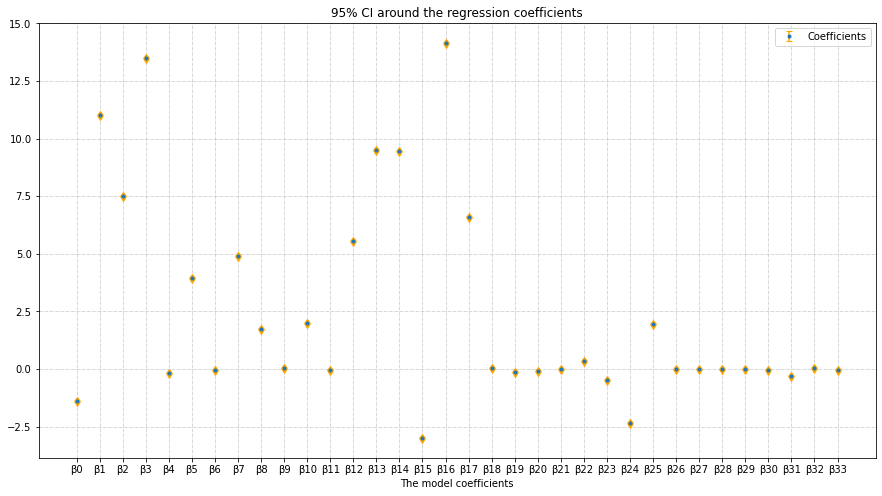

In [30]:
plt.figure(figsize=(15,8))

plt.errorbar(np.arange(X_for_var_rr.shape[1]), w_for_var_rr,
             yerr=np.vstack([np.squeeze(w_for_var_rr-lower_CI_r), np.squeeze(upper_CI_r-w_for_var_rr)]),
             fmt=".", ecolor='orange', lolims=True, uplims=True, label="Coefficients")

plt.xticks(np.arange(X_for_var_rr.shape[1]), ["β"+str(i) for i in np.arange(X_for_var_rr.shape[1])])

plt.title("95% CI around the regression coefficients")
plt.xlabel("The model coefficients")
plt.legend()
plt.grid(which='both', linestyle='-.', linewidth=0.5)
plt.show()

Compute the CI for the predictions.

In [31]:
var_ = variance_least_squares_line(X_for_var_rr, y, Ridge_prediction_data)
lower_CI_line_r, upper_CI_line_r = confidence_interval(X_for_var_rr.shape[0], X_for_var_rr.shape[1], Ridge_prediction_data, var_)

Plot the CI for the predictions.

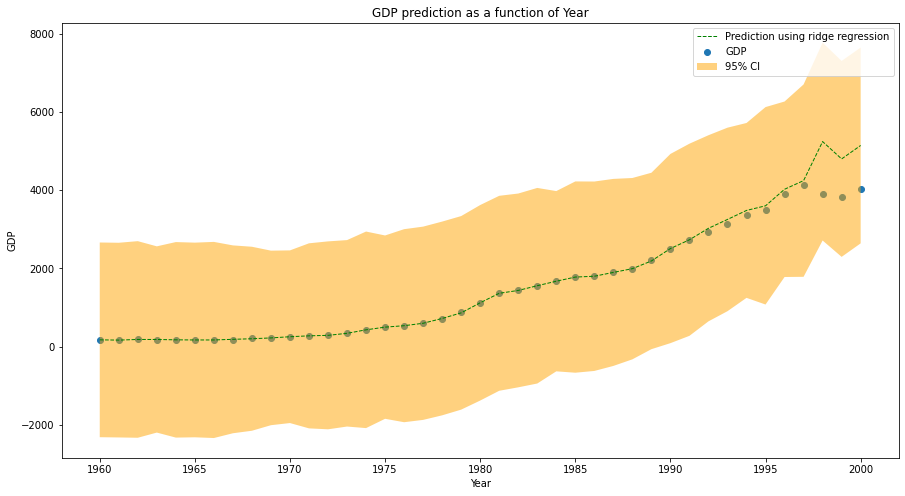

In [32]:
plt.figure(figsize=(15,8))
plt.scatter(year, y, label="GDP")
plt.plot(year, Ridge_prediction_data, color="g", lw=1, ls='--', label="Prediction using ridge regression")
plt.gca().fill_between(year, np.squeeze(lower_CI_line_r), np.squeeze(upper_CI_line_r),
                       label="95% CI",
                       #color="#b9cfe7",
                       color="orange",
                       alpha=0.5,
                       edgecolor=None)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

### Subset selection

Find the optimal combination of features in terms of $r^2$.

In [33]:
scores, subsets = best_subset_ls(X_train, y_train)

In [34]:
i = np.argmax(scores)
sub = subsets[i]
variables = "\n\t- ".join(dataset.columns[list(sub)])
print("Best performance on the test: ", scores[i], "the subset is: ", sub)
print("This corresponds to the following variables:\n\t- " + variables)

Best performance on the test:  0.997861422546142 the subset is:  (0, 2, 5, 6, 7, 9, 12, 14, 15)
This corresponds to the following variables:
	- YEAR
	- CONSUMPTION SHARE OF CGPD (unit %)
	- EXCHANGE RATE (unit US=1)
	- GOVERNMENT SHARE OF CGDP (unit %)
	- GOVERNMENT SHARE OF RGDPL (unit %)
	- INVESTMENT SHARE OF RGDPL (unit %)
	- POPULATION (unit 000S)
	- PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE)
	- PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100)


In [35]:
X_ss = X[:, sub]
X_train_ss, X_test_ss, _, _ = train_test_split(X_ss, y)

Compute lest squares estimator using subset of features.

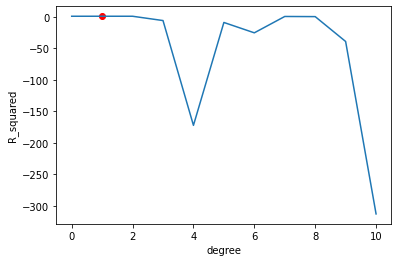

In [36]:
d_ss = degree_cross_val(X_train_ss, y_train, 10)
X_ls_ss = build_poly(X_ss, d_ss)
X_train_ls_ss, X_test_ls_ss, _, _ = train_test_split(X_ls_ss, y)

In [37]:
LS_w_ss = least_squares(X_train_ls_ss, y_train)

LS_ss_prediction_data = predict(X_ls_ss, LS_w_ss)
LS_ss_prediction_test = predict(X_test_ls_ss, LS_w_ss)

In [38]:
print("Testing R^2:  ", R_squared(y_test, LS_ss_prediction_test),
      "\nFull data R^2:", R_squared(y, LS_ss_prediction_data))

Testing R^2:   -3.456215888371416 
Full data R^2: 0.9115150095818491


In [39]:
print("Full data adjusted R^2:", adjusted_R_squared(y, LS_ss_prediction_data, X.shape[1]))

Full data adjusted R^2: 0.8461130601423462


In [40]:
print("Testing RMSE: ", RMSE(y_test, LS_ss_prediction_test),
      "\nFull data RMSE:", RMSE(y, LS_ss_prediction_data))

print("This implies only", RMSE(y_test, LS_ss_prediction_test)/tot, "error rate on the test and", RMSE(y, LS_ss_prediction_data)/tot, "on the full dataset")

Testing RMSE:  842.1165990223786 
Full data RMSE: 400.74066623391286
This implies only 0.23166342594843337 error rate on the test and 0.11024240083188154 on the full dataset


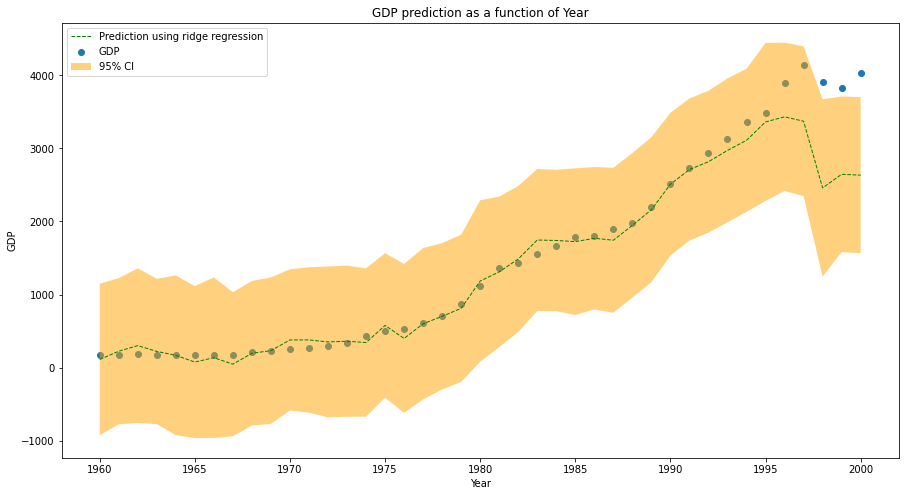

In [41]:
X_for_var_ls_ss, w_for_var_ls_ss = (X_ls_ss[:, 1:], LS_w_ss[1:]) if d_ss > 0 else (X_ls_ss, LS_w_ss)
var_ = variance_least_squares_line(X_for_var_ls_ss, y, LS_ss_prediction_data)
lower_CI_line_ls_ss, upper_CI_line_ls_ss = confidence_interval(X_for_var_ls_ss.shape[0], X_for_var_ls_ss.shape[1], LS_ss_prediction_data, var_)
plt.figure(figsize=(15,8))
plt.scatter(year, y, label="GDP")
plt.plot(year, LS_ss_prediction_data, color="g", lw=1, ls='--', label="Prediction using ridge regression")
plt.gca().fill_between(year, np.squeeze(lower_CI_line_ls_ss), np.squeeze(upper_CI_line_ls_ss),
                       label="95% CI",
                       #color="#b9cfe7",
                       color="orange",
                       alpha=0.5,
                       edgecolor=None)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

In [42]:
lambda_r_ss, d_r_ss = cross_val_ridge(X_train_ss, y_train, max_lambda=2, plot=False)
print("The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively:",
      lambda_r_ss, d_r_ss)

The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively: 0.2 2


In [43]:
X_r_ss = build_poly(X_ss, d_ss)
X_train_r_ss, X_test_r_ss, _, _ = train_test_split(X_r_ss, y)

In [44]:
Ridge_w_lambda_ss = ridge_regression(X_train_r_ss, y_train, lambda_r_ss)

Ridge_prediction_lambda_ss_data = predict(X_r_ss, Ridge_w_lambda_ss)
Ridge_prediction_lambda_ss_test = predict(X_test_r_ss, Ridge_w_lambda_ss)

In [45]:
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_lambda_ss_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_lambda_ss_data))

Testing R^2:  -5.609289714261868 
Full data R^2: 0.8698788222212428


In [46]:
print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_lambda_ss_data, X.shape[1]))

Full data adjusted R^2: 0.7737022995152049


In [47]:
print("Testing RMSE: ", RMSE(y_test, Ridge_prediction_lambda_ss_test),
      "\nFull data RMSE:", RMSE(y, Ridge_prediction_lambda_ss_data))

print("This implies only", RMSE(y_test, Ridge_prediction_lambda_ss_test)/tot, "error rate on the test and", RMSE(y, Ridge_prediction_lambda_ss_data)/tot, "on the full dataset")

Testing RMSE:  1025.5728402965017 
Full data RMSE: 485.96232877058173
This implies only 0.28213161695015987 error rate on the test and 0.13368659173274433 on the full dataset


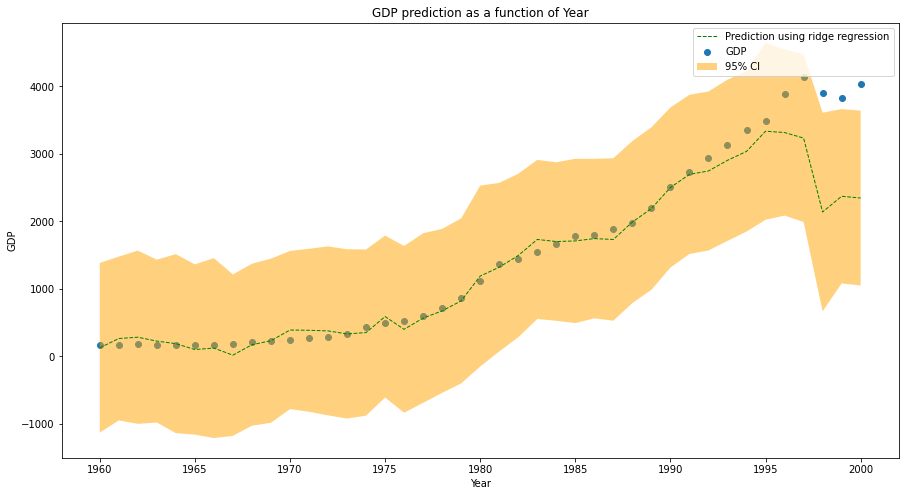

In [48]:
X_for_var_r_ss, w_for_var_r_ss = (X_r_ss[:, 1:], Ridge_w_lambda_ss[1:]) if d_r_ss > 0 else (X_r_ss, Ridge_w_lambda_ss)
var_ = variance_least_squares_line(X_for_var_r_ss, y, Ridge_prediction_lambda_ss_data)
lower_CI_line_r_ss, upper_CI_line_r_ss = confidence_interval(X_for_var_r_ss.shape[0], X_for_var_r_ss.shape[1], Ridge_prediction_lambda_ss_data, var_)
plt.figure(figsize=(15,8))
plt.scatter(year, y, label="GDP")
plt.plot(year, Ridge_prediction_lambda_ss_data, color="g", lw=1, ls='--', label="Prediction using ridge regression")
plt.gca().fill_between(year, np.squeeze(lower_CI_line_r_ss), np.squeeze(upper_CI_line_r_ss),
                       label="95% CI",
                       #color="#b9cfe7",
                       color="orange",
                       alpha=0.5,
                       edgecolor=None)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

### General to simple

In [49]:
idx = general_to_simple(X_train, y_train)

In [50]:
X_g2s = X[:, idx]
X_train_g2s, X_test_g2s, _, _ = train_test_split(X_ss, y)

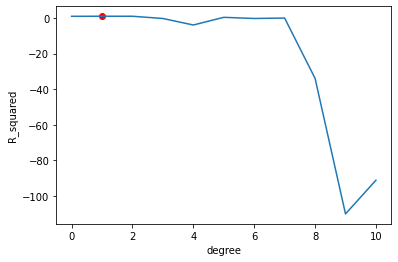

In [51]:
d_g2s = degree_cross_val(X_train_g2s, y_train, 10)
X_ls_g2s = build_poly(X_g2s, d_g2s)
X_train_ls_g2s, X_test_ls_g2s, _, _ = train_test_split(X_ls_g2s, y)

In [52]:
LS_w_g2s = least_squares(X_train_ls_g2s, y_train)

LS_g2s_prediction_data = predict(X_ls_g2s, LS_w_g2s)
LS_g2s_prediction_test = predict(X_test_ls_g2s, LS_w_g2s)

In [53]:
print("Testing R^2:  ", R_squared(y_test, LS_g2s_prediction_test),
      "\nFull data R^2:", R_squared(y, LS_g2s_prediction_data))

Testing R^2:   0.12272061490273656 
Full data R^2: 0.9827285043275463


In [54]:
print("Full data adjusted R^2:", adjusted_R_squared(y, LS_g2s_prediction_data, X.shape[1]))

Full data adjusted R^2: 0.9699626162218197


In [55]:
print("Testing RMSE: ", RMSE(y_test, LS_g2s_prediction_test),
      "\nFull data RMSE:", RMSE(y, LS_g2s_prediction_data))

print("This implies only", RMSE(y_test, LS_g2s_prediction_test)/tot, "error rate on the test and", RMSE(y, LS_g2s_prediction_data)/tot, "on the full dataset")

Testing RMSE:  373.6440566286266 
Full data RMSE: 177.04904390086952
This implies only 0.10278821524756314 error rate on the test and 0.048705592691778835 on the full dataset


In [56]:
from importlib import reload
print(os.getcwdb())
#os.chdir("econometrics/GDP/src")
#reload(statistical_analysis)
os.chdir("../notebooks")

b'/home/ayman/Documents/ma1/econometrics/GDP/notebooks'


In [57]:
idx = general_to_simple_ridge(X_train, y_train)

In [58]:
X_g2s = X[:, idx]
X_train_g2s, X_test_g2s, _, _ = train_test_split(X_ss, y)

In [59]:
lambda_r_g2s, d_r_g2s = cross_val_ridge(X_train_g2s, y_train, plot=False)
print("The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively:",
      lambda_r_g2s, d_r_g2s)

The optimal hyper-parameters for the polynomial expansion and l2 regularization term are respectively: 0.5700000000000001 2


In [60]:
X_r_g2s = build_poly(X_g2s, d_g2s)
X_train_r_g2s, X_test_r_g2s, _, _ = train_test_split(X_r_g2s, y)

In [61]:
Ridge_w_lambda_g2s = ridge_regression(X_train_r_g2s, y_train, lambda_r_g2s)

Ridge_prediction_lambda_g2s_data = predict(X_r_g2s, Ridge_w_lambda_g2s)
Ridge_prediction_lambda_g2s_test = predict(X_test_r_g2s, Ridge_w_lambda_g2s)

In [62]:
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_lambda_g2s_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_lambda_g2s_data))

Testing R^2:  -4.455099020751012 
Full data R^2: 0.8863008315641804


In [63]:
print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_lambda_g2s_data, X.shape[1]))

Full data adjusted R^2: 0.802262315763792


In [64]:
print("Testing RMSE: ", RMSE(y_test, Ridge_prediction_lambda_g2s_test),
      "\nFull data RMSE:", RMSE(y, Ridge_prediction_lambda_g2s_data))

print("This implies only", RMSE(y_test, Ridge_prediction_lambda_g2s_test)/tot, "error rate on the test and", RMSE(y, Ridge_prediction_lambda_g2s_data)/tot, "on the full dataset")

Testing RMSE:  931.7307646546275 
Full data RMSE: 454.2628862603462
This implies only 0.2563159795829039 error rate on the test and 0.1249661823961966 on the full dataset
